# Research on Computer Games

From publicly available sources, we have access to historical data (up to 2016) about game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation). 

**Our goal is to identify patterns that determine the success of a game. This will enable us to focus on potentially popular products and plan effective advertising campaigns**.

In the dataset, we encounter the abbreviation ESRB (Entertainment Software Rating Board), which is an association that assigns age ratings to computer games. ESRB evaluates the game content and assigns an appropriate age category, such as "Mature," "Early Childhood," or "Teen."

## Exploring Data from the File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('/datasets/games.csv') 
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Description of Variables**
* Name — game name
* Platform — platform
* Year_of_Release — release year
* Genre — game genre
* NA_sales — sales in North America (millions of copies sold)
* EU_sales — sales in Europe (millions of copies sold)
* JP_sales — sales in Japan (millions of copies sold)
* Other_sales — sales in other countries (millions of copies sold)
* Critic_Score — critic score (maximum 100)
* User_Score — user score (maximum 10)
* Rating — rating from the ESRB (Entertainment Software Rating Board) organization, which assigns age-appropriate categories to computer games.

Let's assess the size of the table, variable types, and also check for possible missing values:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


* There are a total of 16,715 entries.
* Some data has incorrect variable types (for example, `user_score`).
* Variables `critic_score`, `user_score`, and `rating` have more than 40% missing values, which cannot be ignored.

<a id="step1"></a>
**Conclusion**

Each row of the table contains detailed information about the sales of computer games, their user and expert ratings, genres, and platforms.

First, we need to prepare the data for analysis: handle the identified missing values, change data types, and convert variable names to lowercase.

Then, we will proceed with the actual analysis.

## Data Preparation for Analysis

In [5]:
df.columns = df.columns.str.lower()

### Handling Missing Values and Incorrect Types

In [6]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Let's replace the missing values (NA) with 0:

In [7]:
df['critic_score'] = df['critic_score'].fillna(0)

and let's check why `user_score` has the `object` data type:

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The parameter `tbd` stands for *to be determined*, which means that ratings are not displayed because there are less than four (4) reviews in the platform's database.

Reference: [https://www.metacritic.com/faq](https://www.metacritic.com/faq)

> * Since the variable `user_score` is needed for further calculations, only a numerical replacement will be suitable.
> * It could have been possible to substitute `critic_score` data, but those are measured on a 100-point scale.
> * Let's try replacing `na` with 0 and `tbd` with -1, and also change the data type from `object` to `float`.

Before replacing `na` with 0, let's check how many games in our database have `user_score` = 0.

In [9]:
df.loc[df['user_score'] == '0'] #only 1 game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,0.0,0,E


In [10]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1

In [11]:
df['user_score'] = df['user_score'].fillna(0).astype(float)

The `rating` category also has 40% of missing values.

In [12]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

* "Rating Pending" (RP) - "Rating Pending"
* "EC" ("Early childhood") - "Early childhood"
* "E" ("Everyone") - "Everyone" **or** "K-A" ("Kids to Adults")
* "E10+" ("Everyone 10 and older") - "Everyone 10 and older"
* "T" ("Teen") - "Teen" (13+)
* "M" ("Mature") - "Mature" (17+)
* "AO" ("Adults Only 18+") - "Adults Only 18+"
* "RP" ("Rating Pending") - "Rating Pending"

Reference: [https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

Let's merge the same categories and replace `na` with `Unknown`:

In [13]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [14]:
df['rating'] = df['rating'].fillna('Unknown')

Year of release - `year_of_release` has an incorrect type, but about 1% of missing values prevent us from changing it; 

Since the number of missing values is very small, let's remove them using the `dropna()` method and change the type from `float64` to `int`

In [15]:
df.dropna(subset = ['year_of_release'], inplace = True)
df['year_of_release'] = df['year_of_release'].astype(int)

Even though `name` and `genre` also have very few missing values, let's replace them with `Unknown`:

In [16]:
df['name'] = df['name'].fillna('Unknown')

In [17]:
df['genre'] = df['genre'].fillna('Unknown')

In [18]:
#final check
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


### Checking for duplicates

Let's check other unique values to avoid mistakes:

In [19]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'Unknown'], dtype=object)

Let's check the data for duplicate rows in the dataframe:

In [21]:
df.duplicated().sum()

0

Add a new variable `total_sales` with the total sales in all regions:

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [23]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


<a id="step2"></a>
**Conclusion**

Several key variables for further analysis - `user_score`, `critic_score`, and `rating` - had over 40% missing values, which we replaced with `0` and `Unknown` accordingly. Furthermore, we replaced the `tbd` category in the rating with `-1`. In the `year_of_release` category, we removed less than 2% of missing values.

We also changed the data type of two variables - `user_score` and `year_of_release` - to `float` and `int`, respectively, to facilitate future calculations.

## Data analysis

### Selection of Relevant Data

At this stage, we need to select key values to describe the actual forecast for the year 2017.

1. Let's see how many games were released in different years overall:

In [24]:
numb_games = df.pivot_table(index='year_of_release', values =[ 'name'],
                               aggfunc={'name': 'count'})
numb_games.columns = ['numb_of_games']
numb_games

,numb_of_games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15



> * From 2006 to 2011, there is a boom: a large number of computer games are released, leading to sales growth.
> * Since 2012, we observe a sharp decline, which continues until 2014.

**Are the data from all periods important?**

* From the table above, it is clear that considering the 20th century is not necessary, as the gaming culture was just gaining momentum. Moreover, for an up-to-date forecast, it's probably not worth considering games released more than 16 years ago.
* Let's try to filter the data from the year 2005, capturing both the peak and decline of computer games.

In [25]:
#filter
df_new = df[(df['year_of_release'] > 2004)]

2. Within the filtered period, let's look at how the data is distributed based on the *number of copies sold across all regions*:

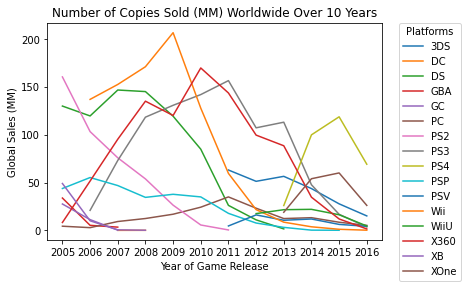

In [26]:
total_sales_by_platforms = pd.pivot_table(df_new, values='total_sales', index='year_of_release', columns='platform',
                    aggfunc=np.sum)
ax = total_sales_by_platforms.plot(xticks=total_sales_by_platforms.index)
ylab = ax.set_ylabel('total_sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Number of Copies Sold (MM) Worldwide Over 10 Years")
ax.set_ylabel("Global Sales (MM)")
ax.set_xlabel("Year of Game Release")
plt.legend(title = 'Platforms', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

> * The graph shows that by the year 2013, 5 entire platforms cease to release games: DS, PS2, GBA, XB, and GC.
> * However, in the same year 2013, 2 new platforms appear, later leading in the number of copies sold - XOne and PS4.
> * It's also possible to identify the top 5 platforms that are leaders in the number of copies sold by 2016: PS4, XOne, 3DS, PS3, and WiiU.

3. Let's also check the median number of years for which games are released on each platform *over the entire period*. After that, we will filter out the platforms that *released games in 2016*.

In [27]:
df_group_max = df.groupby('platform')['year_of_release'].max() 
df_group_min = df.groupby('platform')['year_of_release'].min() 
data_group_total = pd.DataFrame([df_group_max, df_group_min]).T
data_group_total['life_period'] = df_group_max - df_group_min
data_group_total.set_axis(['max_year', 'min_year', 'life_period'], axis='columns', inplace=True)
data_group_total.sort_values('max_year', ascending = False)

,max_year,min_year,life_period
platform,,,
XOne,2016,2013,3
3DS,2016,2011,5
X360,2016,2005,11
WiiU,2016,2012,4
Wii,2016,2006,10
PSV,2016,2011,5
PC,2016,1985,31
PS4,2016,2013,3
PS3,2016,2006,10


In [28]:
print('The median lifespan of platforms that release games over the entire period:', data_group_total['life_period'].median())

The median lifespan of platforms that release games over the entire period: 6.0


Let's take a look at the platforms with games released in 2016:

In [29]:
data_group_total_2016 = data_group_total.query('max_year == 2016')
print('The median lifespan of platforms that release games in 2016:', data_group_total_2016['life_period'].median())

The median lifespan of platforms that release games in 2016: 5.0


> * Based on the median, we should start considering data from the year 2012. However, according to the above graph, by 2012 one of the platforms stops releasing games, and the activity of many platforms begins to decrease.
> * Considering all the mentioned factors, we will consider the data for the **relevant period** from **2013 to 2016**.


In [30]:
#final check
df_actual = df_new[(df_new['year_of_release'] > 2012)]
df_actual['year_of_release'].unique()

array([2013, 2015, 2014, 2016])

### Selecting Profitable Platforms

Earlier, we mentioned the top 5 platforms by the quantity of copies sold worldwide. Let's take another look at the sales dynamics, excluding irrelevant data:

Text(0.5, 1.0, 'Percentage of Copies Sold (%) on Platform')

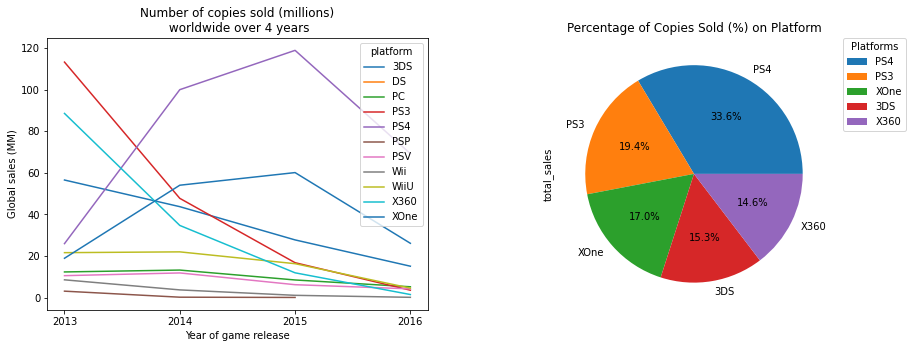

In [31]:
df1 = pd.pivot_table(df_actual, values='total_sales', index='year_of_release', columns='platform',
                    aggfunc=np.sum)
df2 = pd.pivot_table(df_actual, values='total_sales', index='platform',
                   aggfunc=np.sum)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

df1.plot(xticks=df1.index, ax=axes[0])
axes[0].set_title("Number of copies sold (millions)\n worldwide over 4 years")
axes[0].set_ylabel("Global sales (MM)")
axes[0].set_xlabel("Year of game release")

ax2 = df2.sort_values('total_sales', ascending=False).head(5).plot.pie(autopct="%.1f%%", subplots=True, ax=axes[1])
plt.legend(title = 'Platforms', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Percentage of Copies Sold (%) on Platform')

- The PS4 platform accounts for the largest share of all game sales (33%), followed by XOne at 17%. Additionally, the graph above shows that these two platforms, unlike the others, significantly increased their number of games sold (in millions) by 2015.
- This isn't the case for the 3DS, PS3, and X360 platforms – their sales figures sharply declined by 2015. The situation with PS3 is quite logical, as it's an outdated version compared to the PS4.
- There are platforms that don't make it to the top 5 in global sales, yet their figures remain stable over time – WiiU and PC (personal computer). The result for PC can also be explained: it's a platform that isn't subject to updates and is owned by a large number of people.
- Therefore, potentially profitable platforms might include: PS4, 3DS, WiiU, XOne, PC

In [32]:
df_actual.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


###  Analysis of Popular Platforms

In [33]:
#top-5
top_5_platforms = df_actual.loc[df_actual['platform'].isin(['PS4', '3DS', 'XOne', 'WiiU', 'PC'])]

*We have a value of -1 in user ratings. Firstly, I will count how many such values are there and, if necessary, filter them out for calculating variances*.

In [34]:
((len(top_5_platforms.loc[top_5_platforms['user_score'] == -1]))*100) / len(top_5_platforms)

4.173354735152488

In [35]:
#delete -1 in user ratings
top_5_platforms_no_tbd = top_5_platforms.loc[top_5_platforms['user_score'] != -1]

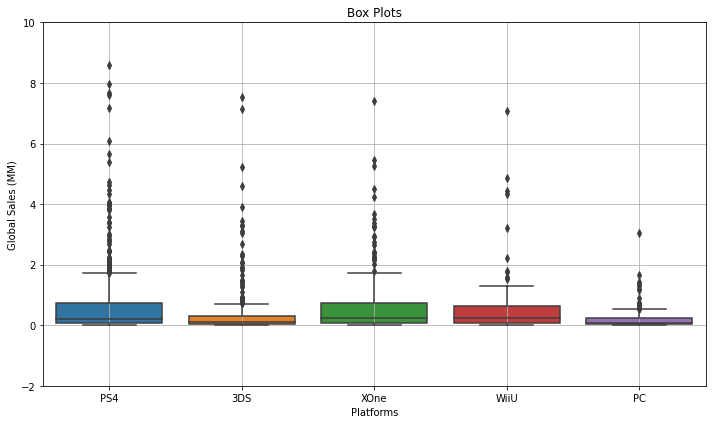

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="platform", y="total_sales", data=top_5_platforms_no_tbd)
plt.ylim([-2,10])
plt.title('Box Plots')
plt.xlabel('Platforms')
plt.ylabel('Global Sales (MM)')
plt.grid()
plt.tight_layout()

> * The selected platforms have many sales outliers of varying frequency. However, almost all platforms (except PC) have best-selling games: rare values beyond the mark of 6 million copies sold.

**1.Do User and Critic Reviews Affect Sales Within a Popular Platform - PS4?**

H0: There is no correlation between reviews and sales.

H1: There is a correlation.

In [37]:
top_platform_PS4 = top_5_platforms_no_tbd.loc[top_5_platforms_no_tbd['platform'] == 'PS4']

Text(0.5, 0.98, 'Box plots: PS4')

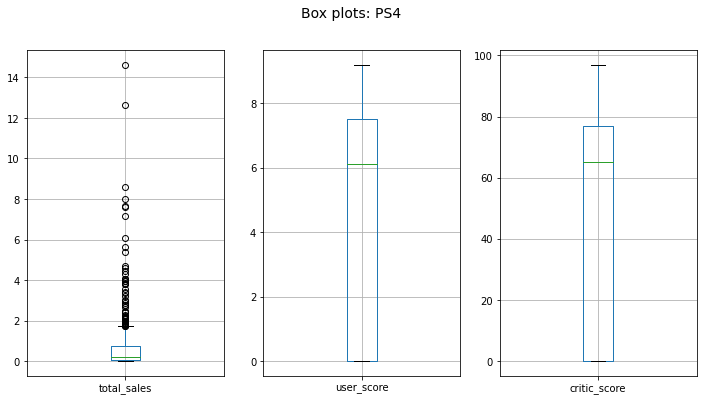

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
top_platform_PS4[['total_sales']].boxplot(ax=axes[0])
top_platform_PS4[['user_score']].boxplot(ax=axes[1])
top_platform_PS4[['critic_score']].boxplot(ax=axes[2])
fig.suptitle('Box plots: PS4', fontsize=14)

> * `total_sales` contains rare outliers.
> * The distribution of `user_score` and `critic_score` is heavily skewed towards 0 due to a significant portion of categories being replaced with `na` and then with 0.

Let's filter out these 0 values and remove the outliers.

In [39]:
#delete outliers
top_platform_PS4 = top_platform_PS4[top_platform_PS4['total_sales'] < 5]

In [40]:
#filter for 0
top_platform_PS4_no_0 = top_platform_PS4[top_platform_PS4['critic_score'] > 0]
top_platform_PS4_no_0 = top_platform_PS4_no_0[top_platform_PS4_no_0['user_score'] > 0]

In [41]:
top_platform_PS4_no_0[['total_sales', 'critic_score', 'user_score']].describe()

,total_sales,critic_score,user_score
count,241.000000,241.000000,241.000000
mean,0.761535,71.684647,6.768465
std,1.067316,12.458269,1.457681
min,0.010000,19.000000,1.500000
25%,0.070000,66.000000,6.200000
50%,0.260000,73.000000,7.100000
75%,0.930000,80.000000,7.800000
max,4.620000,93.000000,9.200000


* The standard deviation of user and critic scores is relatively small, indicating that the values in the dataset are clustered around the mean (6.7 and 71.6 respectively).

Let's take a look at scatter plots:

Text(0.5, 0.98, 'Scatter Plots: PS4')

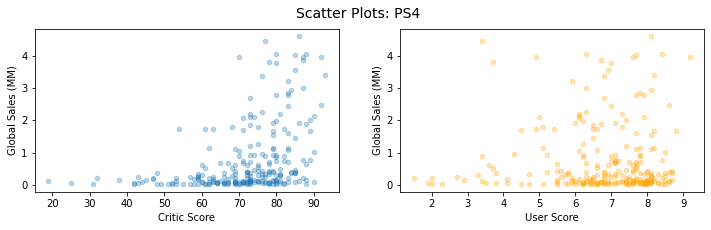

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
top_platform_PS4_no_0.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[0]) 
top_platform_PS4_no_0.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[1], color='orange')
axes[0].set_xlabel("Critic Score")
axes[0].set_ylabel("Global Sales (MM)")
axes[1].set_xlabel("User Score")
axes[1].set_ylabel("Global Sales (MM)")
fig.suptitle('Scatter Plots: PS4', fontsize=14)

Indeed, according to the scatter plots, it seems that critic scores are positively correlated with higher sales. However, let's also calculate the *Spearman correlation coefficient* using a non-parametric approach to assess this relationship. The Spearman correlation is more robust when dealing with non-uniform distributions.

Let's test the correlations on the test dataset:

In [43]:
from scipy.stats import spearmanr

In [44]:
spearmanr(top_platform_PS4_no_0['critic_score'], top_platform_PS4_no_0['total_sales']) 

SpearmanrResult(correlation=0.4755006264705899, pvalue=5.33277620236531e-15)

In [45]:
spearmanr(top_platform_PS4_no_0['user_score'], top_platform_PS4_no_0['total_sales']) 

SpearmanrResult(correlation=-0.004829377346965932, pvalue=0.9405467062111337)

> * According to the Spearman's rank correlation coefficient, there is a positive correlation between critic scores (`critic_score`) and total sales (`total_sales`) - we couldn't accept the null hypothesis H0.
> * However, there is no correlation between user scores (`user_score`) and total sales (`total_sales`) - we accept the null hypothesis H0.

**2. Do user and critic reviews affect sales within the other popular platforms?**

Let's conduct a similar analysis for the remaining platforms:

* H0: There is no correlation between reviews and sales.
* H1: There is a correlation between reviews and sales.

In [46]:
other_platforms = top_5_platforms_no_tbd.loc[top_5_platforms_no_tbd['platform'] != 'PS4']

Text(0.5, 0.98, 'Box plots: 3DS, XOne, WiiU, PC')

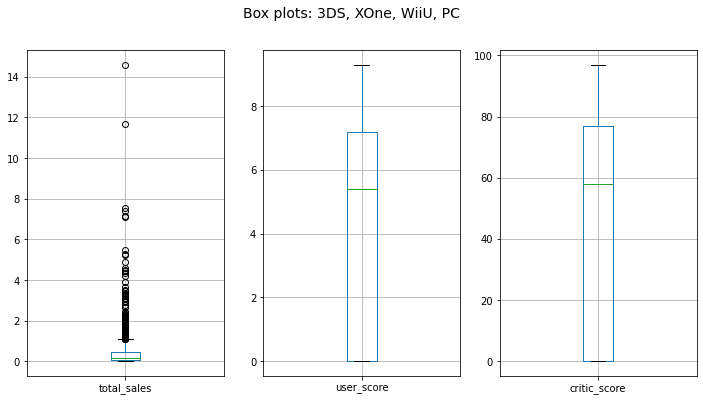

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

other_platforms[['total_sales']].boxplot(ax=axes[0])
other_platforms[['user_score']].boxplot(ax=axes[1])
other_platforms[['critic_score']].boxplot(ax=axes[2])
fig.suptitle('Box plots: 3DS, XOne, WiiU, PC', fontsize=14)

In [48]:
#delete outliers
other_platforms = other_platforms[other_platforms['total_sales'] < 6]

In [49]:
#filter for 0
other_platforms_no_0 = other_platforms[other_platforms['critic_score'] > 0]
other_platforms_no_0 = other_platforms_no_0[other_platforms_no_0['user_score'] > 0]

In [50]:
other_platforms_no_0[['total_sales', 'critic_score', 'user_score']].describe()

,total_sales,critic_score,user_score
count,448.000000,448.000000,448.000000
mean,0.556339,73.258929,6.656696
std,0.858867,12.468122,1.504118
min,0.010000,20.000000,1.400000
25%,0.067500,67.000000,5.800000
50%,0.230000,75.000000,6.900000
75%,0.630000,82.000000,7.800000
max,5.470000,97.000000,9.300000


Now let's build scatter plots and conduct non-parametric tests:

Text(0.5, 0.98, 'Scatter Plots: 3DS, XOne, WiiU, PC')

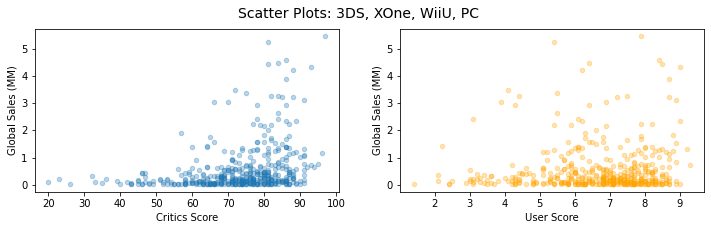

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
other_platforms_no_0.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[0]) 
other_platforms_no_0.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, ax=axes[1], color='orange')
axes[0].set_xlabel("Critics Score")
axes[0].set_ylabel("Global Sales (MM)")
axes[1].set_xlabel("User Score")
axes[1].set_ylabel("Global Sales (MM)")
fig.suptitle('Scatter Plots: 3DS, XOne, WiiU, PC', fontsize=14)

In [52]:
spearmanr(other_platforms_no_0['critic_score'], other_platforms_no_0['total_sales']) 

SpearmanrResult(correlation=0.3599219586045258, pvalue=3.78526106531584e-15)

In [53]:
spearmanr(other_platforms_no_0['user_score'], other_platforms_no_0['total_sales']) 

SpearmanrResult(correlation=0.043655125841282956, pvalue=0.3566000734628997)

> * The critic score is also weakly and positively correlated with sales volumes among the following platforms: 3DS, XOne, WiiU, PC. In the case of user scores, there is no correlation. However, we do not have sufficient grounds to accept H0 about the absence of a correlation between scores (in this case, critics' scores) and sales.
> * This is likely because there are fewer critics in general, and they rarely give low scores.

**3. Are there any differences between genres among popular platforms?**

In [54]:
top_5_platforms_genre = pd.pivot_table(top_5_platforms, values=['name', 'total_sales'], 
                                index=['genre'], aggfunc={'name': 'count',
                             'total_sales': 'median'})
top_5_platforms_genre.sort_values('total_sales', ascending=False)

,name,total_sales
genre,,
Shooter,120,0.495
Sports,110,0.275
Platform,49,0.260
Role-Playing,150,0.190
Fighting,38,0.155
Misc,93,0.120
Racing,57,0.120
Action,443,0.110
Simulation,47,0.100


> * The most popular genres in terms of sales are Shooter, Sports, and Platform.
> * The least popular genres are Puzzle, Strategy, and Adventure.
> * In our dataset, there are the most games of the genres Action (443 games) and Role-Playing (150 games), but they do not belong to the top 3 in terms of sales.
> * **It turns out that the most popular genre is not always the most successful in terms of sales.**

<a id="step3"></a>
**Conclusion**

At this stage, we selected the relevant period from 2013 to 2016, based on the graph data as well as the median lifespan of platforms.

Next, we identified the top 5 platforms based on multiple factors: 1) the quantity of copies sold throughout the relevant period; 2) the dynamics of sales growth/decline during the relevant period. As a result, the following platforms were selected: 'PS4', '3DS', 'XOne', 'WiiU', and 'PC'.

For the selected data, we conducted a correlation analysis, comparing the results with the leading sales platform, PS4. *According to the Spearman test, the sales volume of PS4 games is weakly and positively influenced by critic scores. However, user scores have no influence on sales. As for the other platforms, a strong connection was found between critic scores and sales volume. In the case of user scores, no correlation was observed*.

Finally, we compared genres among the selected top 5 platforms. *As a result, we discovered that there are popular genres with relatively low sales volumes. It might be worth reconsidering the pricing strategy for games in these genres to enhance profitability*.

###  User Profile for Each Region

Let's identify distinctive characteristics for users in each region (NA, EU, JP).

1. The Most Popular Platforms (Top 5):

Let's calculate the share of sales by platforms:

Text(0.5, 1.0, 'Japan')

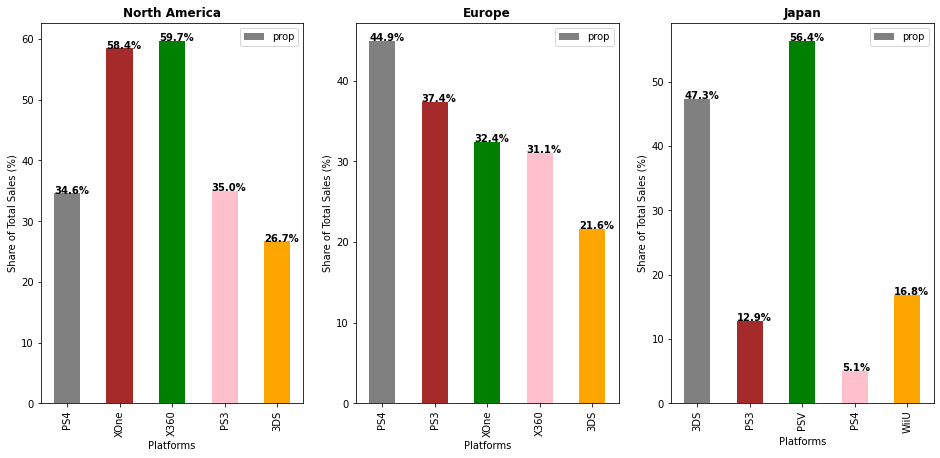

In [55]:
def proportion_platform(df, region_sales):
    regions_platf = df.pivot_table(values=[region_sales,'total_sales'] , index=['platform'], 
                                                 aggfunc={region_sales: np.sum, 'total_sales': np.sum}).sort_values(region_sales, ascending=False).head(5)
    regions_platf['prop'] = ((regions_platf[region_sales] / regions_platf['total_sales'])*100)
    
    return regions_platf
  
def plot(table, axes):
    ax = table.plot.bar(y='prop', ax=axes, color= ['grey', 'brown', 'green', 'pink', 'orange'])
    axes.set_xlabel("Platforms")
    axes.set_ylabel("Share of Total Sales (%)")
    for rect in ax.patches:
        ax.text (rect.get_x(), rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

plot(proportion_platform(df_actual,'na_sales'), axes[0])
axes[0].set_title("North America", weight='bold')

plot(proportion_platform(df_actual,'eu_sales'),axes[1])
axes[1].set_title("Europe", weight='bold')

plot(proportion_platform(df_actual,'jp_sales'),axes[2])
axes[2].set_title("Japan", weight='bold')

> - In North America and Europe, the same platforms are in the top 5: PS4, PS3, XOne, X360, and 3DS. However, in Japan, only 3DS, PS3, and PS4 are from this list. There are new entries not present in the top of North America and Europe, namely WiiU and PSV.
> - In North America, X360 and XOne are leading platforms (60% and 58% respectively), whereas they don't even make it into the top 5 in Japan and are around 32% of all sales in Europe.
> - In Europe, PS4 and its predecessor PS3 are the most popular (45% and 37% respectively). In North America, PS4 accounts for 35%, while in Japan it's only 5%.
> - In Japan, PSV (56%) and 3DS (47%) are the leading platforms, whereas in other regions, 3DS is one of the least popular. Additionally, PSV is completely absent from the rankings of other regions.

2. The Most Popular Genres (Top 5):

Text(0.5, 1.0, 'Japan')

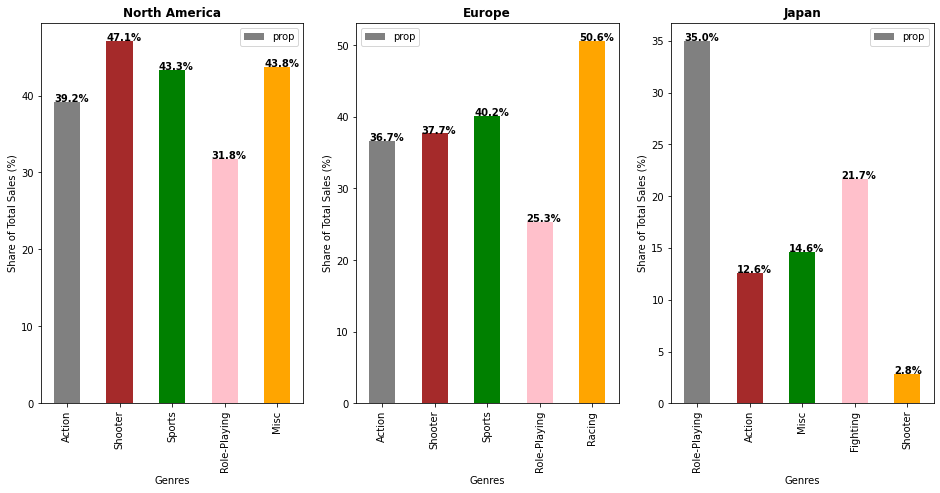

In [56]:
def proportion_genre(df, region_sales):
    regions_genre = df.pivot_table(values=[region_sales,'total_sales'] , index=['genre'], 
                                                 aggfunc={region_sales: np.sum, 'total_sales': np.sum}).sort_values(region_sales, ascending=False).head(5)
    regions_genre['prop'] = ((regions_genre[region_sales] / regions_genre['total_sales'])*100)
    
    return regions_genre
  
def plot(table, axes):
    ax = table.plot.bar(y='prop', ax=axes, color= ['grey', 'brown', 'green', 'pink', 'orange'])
    axes.set_xlabel("Genres")
    axes.set_ylabel("Share of Total Sales (%)")
    for rect in ax.patches:
        ax.text (rect.get_x(),rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

plot(proportion_genre(df_actual,'na_sales'), axes[0])
axes[0].set_title("North America", weight='bold')

plot(proportion_genre(df_actual,'eu_sales'),axes[1])
axes[1].set_title("Europe", weight='bold')

plot(proportion_genre(df_actual,'jp_sales'),axes[2])
axes[2].set_title("Japan", weight='bold')

> - In North America and Europe, there are mostly the same popular genres. In Japan, only a few genres coincide with the leaders in other regions.
> - In North America, all the genres that made it to the top 5 are relatively evenly distributed, with Shooter, Sports, and Misc accounting for over 40% each. Similarly, in Europe, Shooter and Sports are popular, comprising 38% and 40% respectively. However, Shooter is not popular in Japan at all (3%), and Sports is not among the top 5 genres.
> - In Europe, Racing is the most popular genre (51%), while it didn't make it into the rankings in other regions.
> - In Japan, Role-Playing (35%) and Fighting (22%) are leading genres. Role-Playing is also in the top 5 genres for other regions, but Fighting didn't make it into those rankings.

### Does the ESRB rating affect sales in a specific region?

<AxesSubplot:title={'center':'Japan'}, xlabel='rating'>

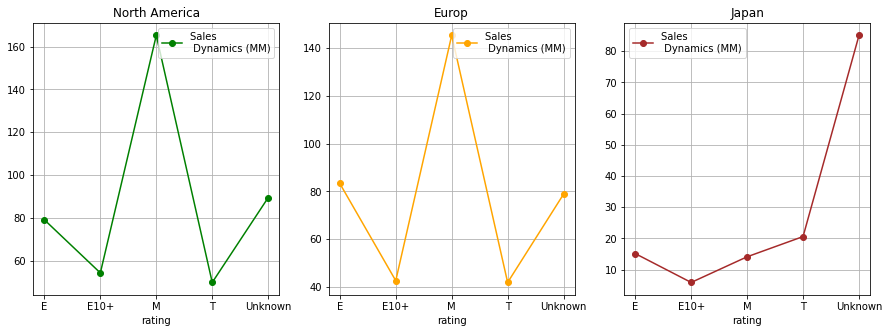

In [57]:
def rating(df, region_sales):
    rating_region = df.pivot_table(values=[region_sales,'total_sales'] , index=['rating'], 
                                                 aggfunc={region_sales: np.sum, 'total_sales': np.sum})   
    return rating_region

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
rating(df_actual,'na_sales').plot(y='na_sales', kind='line', label = 'Sales \n Dynamics (MM)', grid=True, style='o-', c='green', title='North America', ax=axes[0])

rating(df_actual,'eu_sales').plot(y='eu_sales', kind='line', label = 'Sales \n Dynamics (MM)', grid=True, style='o-', c='orange', title='Europ', ax=axes[1])
rating(df_actual,'jp_sales').plot(y='jp_sales', kind='line', label = 'Sales \n Dynamics (MM)', grid=True, style='o-', c='brown', title='Japan', ax=axes[2])

> - The influence of the ESRB rating in Europe and North America is almost identical - games with the "M" ("Mature") rating, which is intended for adults (17+), cover the majority of sales. These data likely reflect the target audience of computer games in each region. Games aimed at teenagers and children in these regions contribute relatively less to the platforms' revenue.
> - In Japan, on the contrary, the "T" ("Teen") rating increases sales. We can observe on the graph that there are many entries with the "Unknown" rating in Japan. This is likely due to the presence of the Computer Entertainment Rating Organization in Japan, which has its own breakdown and naming conventions.

> - *ESRB operates only within the territory of North America, while in Japan there is a similar organization known as CERO. I believe that, on one hand, foreign games might not receive ESRB ratings if they already have their own labeling, possibly to avoid conflicts. Hence, it's quite possible that some of the games could be products of Japan or even Korean games (as they have their own organization). On the other hand, since these games are sold in their respective markets, rating assignment could be mandatory. This implies that our dataset might actually be a combination of two tables: sales data from the Western and Eastern markets. In any case, this is a very illustrative example. The notable difference between these markets (Eastern and Western) leads us to consider that the omissions are not random.*

Source: https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization

<a id="step4"></a>
**Conclusion**

If we were to outline a rough profile of gamers from different regions, the summaries would be as follows:

**North America**:

Top 5 platforms: PS4, PS3, XOne, X360, 3DS, with XOne and X360 leading the way. The most popular genres are Shooter, Sports Delivery Type, and Misc, all sharing approximately equal shares of total sales. Consumers from this region tend to purchase games with an "M" (17+) rating the most. This category likely includes the key target audience.

**Europe**:

Consumers from this region show fairly similar preferences to those in North America. Here, the top platforms are also PS4, PS3, XOne, X360, 3DS, with PS4 and PS3 being the leaders. The most popular genres are Shooter, Sports Delivery Type, and Racing. The last genre is unique to Europe. Similar to North America, games with an "M" (17+) rating are more popular among European gamers.

**Japan**:

The preferences of Japanese gamers differ from those of the residents of the two aforementioned regions. New platforms emerge in the top 5: PSV and 3DS, with either being not popular at all (3DS) or absent from the ranking (PSV). Preferred genres include Role-Playing and Fighting. The latter is also absent from the ranking in other regions.

###  Hypothesis Testing

In [58]:
#Since hypothesis testing is based on comparing averages, we need to remove the "markers": extra 0 and -1
df_actual_no_tbd = df_actual.loc[df_actual['user_score'] != -1]

In [59]:
df_actual_filtered = df_actual_no_tbd[df_actual_no_tbd['user_score'] > 0]

We need to test several hypotheses about *the equality of means between two different platforms and two different genres*. 

To apply a t-test, certain conditions are required:

**First condition**: Data within subgroups should be normally distributed.

In [60]:
from scipy import stats

In [61]:
def shapiro_test(df):
    alpha = 0.05
    x,y = stats.shapiro(df['user_score'])
    print('p-value:', y)
    if (y < alpha):
        print("We reject the null hypothesis")
    else:
        print("Failed to reject the null hypothesis")

In [62]:
def var_pr(df1, df2): 
    x = round(df1.var()/df2.var()*100)
    if x >= 5:
        return False
    else:
        return True

**2nd condition**: The *variances* of the subgroups should be *homogeneous*.

In [63]:
def leven_test(df1, df2):
    alpha = 0.05
    results = stats.levene(df1['user_score'], df2['user_score'])
    print('p-value:', results.pvalue)
    if (results.pvalue < alpha):
        print("We reject the null hypothesis")
    else:
        print("Failed to reject the null hypothesis")

#### Hypothesis 1
*The average user ratings of the Xbox One and PC platforms are equal*, where:
- H0: the average ratings of the platforms are equal
- H1: the average ratings are not equal

In [64]:
df_actual_XOne = df_actual_filtered.loc[df_actual_filtered['platform'] == 'XOne']

In [65]:
df_actual_PC = df_actual_filtered.loc[df_actual_filtered['platform'] == 'PC']

Let's check the distribution of means:
* H0 - the data is normally distributed
* H1 - the data is not normally distributed

In [66]:
shapiro_test(df_actual_XOne)

p-value: 1.5249203897838015e-05
We reject the null hypothesis


In [67]:
var_pr(df_actual_XOne['user_score'], df_actual_PC['user_score'])

False

According to the criterion, the data is not normally distributed - *do not accept H0*.
We compare the averages of *ranking*. This category need not be normally distributed.

Let's test the hypothesis about the homogeneity of the samples:

* H0 - sample variances are equal
* H1 - sample variances are not equal

In [68]:
leven_test(df_actual_XOne, df_actual_PC)

p-value: 0.003897553110130418
We reject the null hypothesis


According to the criterion, the variances of the two samples are not equal. The conditions for performing a t-test are not met, so using this test alone will not be sufficient.

We also use the nonparametric Mann-Whitney U-test, which is less sensitive to the characteristics of our samples:

In [69]:
#T-Test

alpha_t_test = 0.05
result_t_test = stats.ttest_ind(df_actual_XOne['user_score'], df_actual_PC['user_score'], equal_var = False)

In [70]:
print('p-value:', result_t_test.pvalue)

if result_t_test.pvalue < alpha_t_test :
    print("We reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.14759594013430463
Failed to reject the null hypothesis


In [71]:
#U-Test
alpha_u_test = 0.05
result_u_test = stats.mannwhitneyu(df_actual_XOne['user_score'], df_actual_PC['user_score'])

In [72]:
print('p-value:', result_u_test.pvalue)

if result_u_test.pvalue < alpha_u_test :
    print("We reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.5011006734622374
Failed to reject the null hypothesis


In [73]:
print('Median user rating of the XOne platform:', df_actual_XOne['user_score'].median())
print('Median user rating of the PC platform:', df_actual_PC['user_score'].median())

Median user rating of the XOne platform: 6.8
Median user rating of the PC platform: 6.8


**We don't have enough reason to reject the H0 hypothesis that the user ratings of the two platforms are equal.**

#### Hypothesis 2
*Average user ratings for the Action and Sports genres are different*:
 - H0: average ratings are equal
 - H1: average ratings are not equal

In [74]:
df_actual_Action = df_actual_filtered.loc[df_actual_filtered['genre'] == 'Action']

In [75]:
df_actual_Sports = df_actual_filtered.loc[df_actual_filtered['genre'] == 'Sports']

We apply the Shapiro-Wilk criterion:
    
* H0 - data is normally distributed
* H1 - data is not normally distributed

In [76]:
shapiro_test(df_actual_Action)

p-value: 1.0798927229597587e-14
We reject the null hypothesis


In [77]:
var_pr(df_actual_Action['user_score'], df_actual_Sports['user_score'])

False

We apply the Levin criterion:
    
* H0 - sample variances are equal
* H1 - sample variances are not equal

In [78]:
leven_test(df_actual_Action, df_actual_Sports)

p-value: 4.2566688218274047e-07
We reject the null hypothesis


Similarly, we apply the t-test together with the non-parametric Mann-Whitney U-test:

In [79]:
#T-Test

alpha_t_test2 = 0.05
result_t_test2 = stats.ttest_ind(df_actual_Action['user_score'], df_actual_Sports['user_score'], equal_var = False)

In [80]:
print('p-value:', result_t_test2.pvalue)

if result_t_test2.pvalue < alpha_t_test2 :
    print("We reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 1.4460039700704315e-20
We reject the null hypothesis


In [81]:
#U-Test

alpha_u_test2 = 0.05
result_u_test2 = stats.mannwhitneyu(df_actual_Action['user_score'], df_actual_Sports['user_score'])

In [82]:
print('p-value:', result_u_test2.pvalue)

if result_u_test2.pvalue < alpha_u_test2 :
    print("We reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 1.5189170584819927e-23
We reject the null hypothesis


In [83]:
print('Median User Rating for the Action Genre:', df_actual_Action['user_score'].median())
print('Median User Rating for the Sports Genre:', df_actual_Sports['user_score'].median())

Median User Rating for the Action Genre: 7.1
Median User Rating for the Sports Genre: 5.5


**We also do not have enough reason to reject the H0 hypothesis about the equality of the user ratings of the two genres.**

<a id="step5"></a>
**Conclusion**

We tested several hypotheses:

1. The average user ratings of the Xbox One and PC platforms are the same;
2. The average user ratings of the genres Action and Sports are different.


In the first case, we could not reject H0 about the equality of the average XOne and PC platforms. However, the averages for Action and Sports games turned out to be different - we reject the H0 hypothesis.

##  General Conclusion

We analyzed the data for the period from 2013 to 2016. This period was chosen not by chance: looking at the graph of platforms with games released on them and total revenue, we noticed that by 2013, many platforms had stopped releasing games. Additionally, in 2013, two other platforms emerged that sold the highest number of copies. We also established an approximate "lifespan" of a platform - from the release of the first game to the release of the last one - up to 5 years.

Having the relevant timeframe, we identified the top five platforms that not only sold the most games throughout the period but also remained relatively stable in sales: 'PS4', '3DS', 'XOne', 'WiiU', 'PC'.

We found that critic scores are correlated with sales growth, both for the leading platform in terms of copies sold – PS4, and for the other platforms in the top 5. As for user scores, they hardly influence sales on PS4 and other platforms. We also discovered that the most common genres are not necessarily the best-selling ones.

We created an approximate consumer profile based on the most popular sales categories in different regions:

*North America*:
- Platforms: X360 and XOne;
- Genres: Shooter, Misc, Sports;
- Rating: "M" ("Mature") — for adults (17+).

*Europe*:
- Platforms: PS4 and PS3;
- Genres: Racing and Sports;
- Rating: "M" ("Mature") — for adults (17+).

*Japan*:
- Platforms: PS4 and PS3;
- Genres: Role-Playing and Fighting;
- Rating: "T" ("Teen") — for teens (13+).

*However, when considering potentially profitable platforms and genres for all regions, the following can be highlighted*:
- Platforms: PS4/PS3 and 3DS;
- Genres: Action and Role-Playing.

Finally, we tested several hypotheses to understand how user ratings can vary. To do this, we took several platforms and genres with different levels of copies sold. As a result, we found that the average user scores for the PC and XOne platforms were equal. Regarding genres, the difference in average ratings between Action and Sports games turned out to be statistically significant.

Therefore, for the development of future marketing strategy, it's advisable for a potential client to pay attention to platforms with high critic ratings, the regional preferences, and also focus on genres popular among users, such as Role-Playing and Action.